## Useful Functions (Run this block first)

In [26]:
(* Define a function `org` that simplifies an expression `exp` under specific assumptions *)
org[exp_] := 
 FullSimplify[exp, 
  Assumptions -> {
    r >= 1/2 Sqrt[M^2 - Q^2], (* Assume `r` is greater than or equal to half the square root of (M^2 - Q^2) *)
    r >= 0,                    (* `r` is non-negative *)
    R >= 0,                    (* `R` is non-negative *)
    M >= 0,                    (* `M` (mass) is non-negative *)
    rh >= 0,                   (* `rh` (horizon radius) is non-negative *)
    x >= -1,                   (* `x` is between -1 and 1 *)
    x <= 1,                    (* `x` is less than or equal to 1 *)
    q <= 1,                    (* `q` is between -1 and 1 *)
    q >= -1                    (* `q` is greater than or equal to -1 *)
  }
]

(* Define a function `org2` that extracts the last element if the head of `a` is `Times` *)
org2[a_] := 
  If[Head@a === Times, 
    a[[-1]],   (* If the head of the expression is `Times`, extract the last element (effectively considering it as a factor) *)
    a          (* Otherwise, return `a` itself unchanged *)
  ]


## Solve the perturbation equation and compare

The perturbation equation of EMV model

2
   Q  α Bt[R]                     2
----------------- + 2 R Bt'[R] + R  Bt''[R]
 2
Q  + R (-2 M + R)
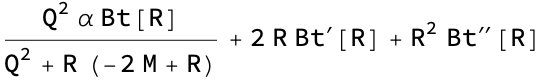

In [30]:
blpeom = (Q^2 \[Alpha] Bt[R])/(Q^2 + R (-2 M + R)) + 2 R Derivative[1][Bt][R] +
  R^2 Derivative[2][Bt][R]

Simplifying the perturbation equation through a coordinate transformation to its standard hypergeometric form.

α Bt[ζ] + 2 ζ (Bt'[ζ] + 2 (1 + ζ) Bt''[ζ])
                               3   Sqrt[1 - 4 α]  3   Sqrt[1 - 4 α]
{{Bt[ζ] -> ζ Hypergeometric2F1[- - -------------, - + -------------, 2, -ζ]}}
                               4         4        4         4
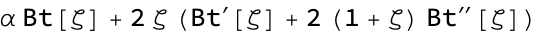
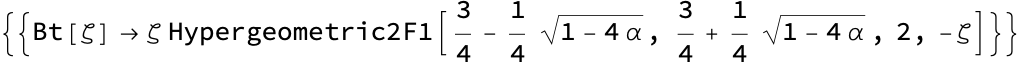

In [31]:
1/(4  \[Zeta])  blpeom /. Bt -> (Bt[(Q^4 + Q^2  #  (-2  M + #))/((M^2 - Q^2)  #^2)] &) /. R -> Q^2/(M + Sqrt[(M - Q)  (M + Q)  (1 + \[Zeta])]) // org // org2 // org
psol = DSolve[{%==0,Bt[0]==0}, Bt[\[Zeta]], \[Zeta]]/.C[1]->1

The BL coordinate system allows us to transform the perturbation equation into the desired form in the article.

2      2    2      2
-16 Q  r (-M  + Q  + 4 r ) α Bt[r] - 
 
                                        3      2      2        2        3
>   r (M - Q + 2 r) (M + Q + 2 r) (8 (-M  + M Q  - 3 M  r + 3 Q  r + 4 r ) Bt'[r] - 
 
                                     2    2      2
>      (M - Q + 2 r) (M + Q + 2 r) (M  - Q  - 4 r ) Bt''[r])
                                                                   2
            1             1             2 r                    16 Q  α
{1, 4 (----------- + ----------- + --------------), -----------------------------}
       M - Q + 2 r   M + Q + 2 r    2    2      2                2              2
                                   M  - Q  - 4 r    (M - Q + 2 r)  (M + Q + 2 r)
Null . {Bt''[r], Bt'[r], Bt[r]}
Null . {Bt''[r], Bt'[r], Bt[r]} + (8 
 
            2
>      (-2 Q  α Bt[r] + 
 
                                          3      2      2        2        3
          (-M + Q - 2 r) (M + Q + 2 r) (-M  + M Q  - 3 M  r + 3 Q  r + 4 r ) Bt'[r]
>         -------------------------------------------------------------------------)) / 
                                         2    2      2
                                       -M  + Q  + 4 r
 
                   2              2
>    ((M - Q + 2 r)  (M + Q + 2 r) ) - Bt''[r]
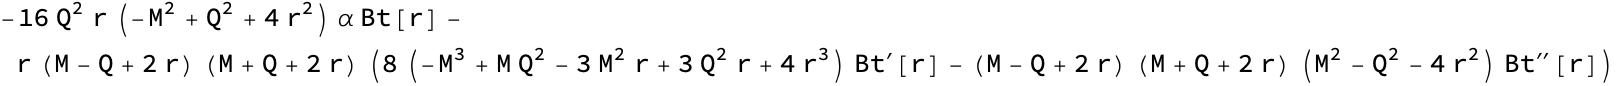
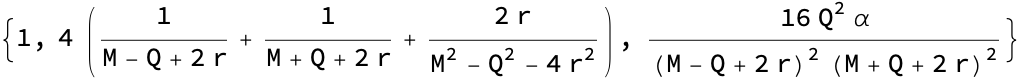
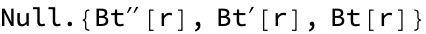
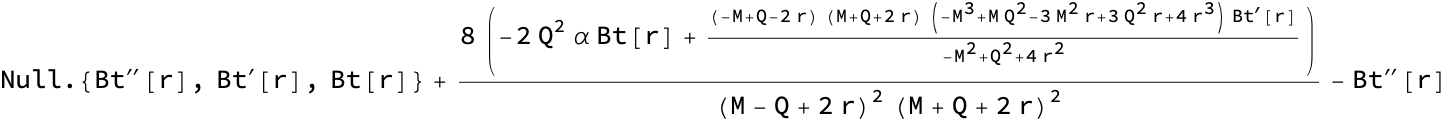

In [47]:
(* Transform the perturbation equation using a different coordinate transformation (isopeom), corresponding to isotropic coordinates. *)
isopeom = blpeom /. Bt -> (Bt[1/2  (-M + # + Sqrt[Q^2 - 2  M  # + #^2])] &) /. R -> M + (M^2 - Q^2)/(4  r) + r // org // org2

(* Extract the coefficients of Bt''[r], Bt'[r], and Bt[r] in the transformed `isopeom` equation *)
Coefficient[isopeom/(r  (M - Q + 2 r)^2  (M + Q + 2 r)^2  (M^2 - Q^2 - 4  r^2)), #] & /@ {Bt''[r], Bt'[r], Bt[r]} // org

(* Collect the extracted coefficients in a matrix form (isopeom2) *)
isopeom2 = %.{Bt''[r], Bt'[r], Bt[r]}

(* Subtract the original equation from `isopeom2` to verify simplification *)
isopeom2 - isopeom/(r  (M - Q + 2 r)^2  (M + Q + 2 r)^2  (M^2 - Q^2 - 4  r^2))//org

This equation can also be transformed into the standard hypergeometric equation through coordinate transformation.

α Bt[ζ] + 2 ζ (Bt'[ζ] + 2 (1 + ζ) Bt''[ζ])
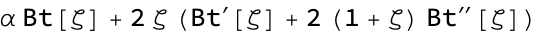

In [12]:
isozetaeom = isopeom2/. Bt -> (Bt[(Q^2 (-M^2 + Q^2 + 4  #^2)^2)/((M^2 - Q^2) (M^2 - Q^2 + 4  M  # + 4  #^2)^2)] &) /. r -> 1/2  (-M + Sqrt[Q^2 (M^2 - Q^2) \[Zeta]]/(M + Sqrt[(M^2 - Q^2) (1 + \[Zeta])]) + Q^2/(M + Sqrt[(M^2 - Q^2) (1 + \[Zeta])])) // Simplify // Together // Numerator // Simplify // org2

The solutions that satisfy the boundary conditions are numerous, and here are two examples of them.

2
 2                   3   Sqrt[1 - 4 α]  3   Sqrt[1 - 4 α]         q
q  Hypergeometric2F1[- - -------------, - + -------------, 2, -(------)]
                     4         4        4         4                  2
                                                                1 - q
------------------------------------------------------------------------
                                      2
                                 1 - q
{q -> 0.976911}
{q -> 0.83759}
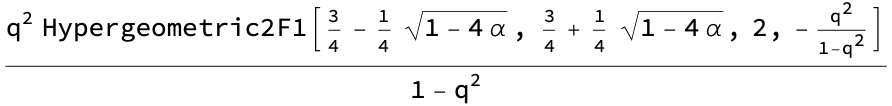
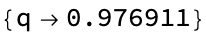
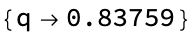

In [54]:
testsol=psol[[1,1,2]]/.\[Zeta]->(q^2/(1-q^2))
FindRoot[testsol==0/.\[Alpha]->10,{q,0.99}]//Chop
FindRoot[testsol==0/.\[Alpha]->10.,{q,0.7}]//Chop

## Plots and Compare

In BL coordinate system.

1    2                  2     2
-(-) (q  (4 + 4 Sqrt[1 - q ] + q  (-3 + z)) (1 + z) 
  4
 
                         3 - Sqrt[1 - 4 α]  3 + Sqrt[1 - 4 α]
>      Hypergeometric2F1[-----------------, -----------------, 2, 
                                 4                  4
 
         2                  2     2
        q  (4 + 4 Sqrt[1 - q ] + q  (-3 + z)) (1 + z)             2                 2  2
>       ---------------------------------------------]) / ((-1 + q ) (1 + Sqrt[1 - q ]) )
                        2                 2  2
               4 (-1 + q ) (1 + Sqrt[1 - q ])
-Graphics-
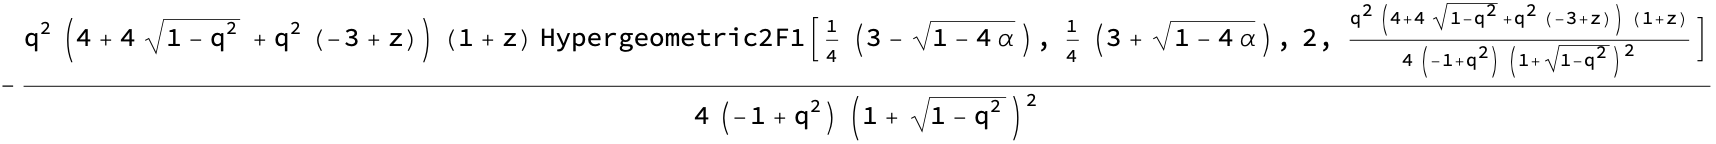
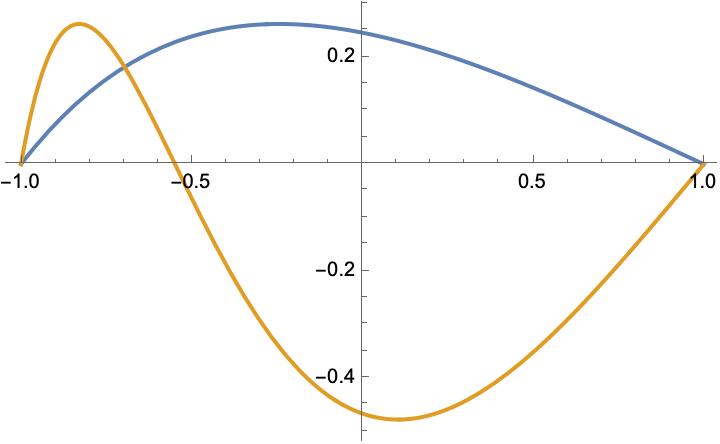

In [60]:
psol2=psol[[1,1,2]]/.\[Zeta] ->(Q^4 + Q^2  R  (-2  M + R))/((M^2 - Q^2)  R^2)/. Q->q M /. M-> rh/(1+Sqrt[(1 - q^2)]) /. R->2 rh/(1-z) /. rh->1 //org
Plot[psol2/.{\[Alpha]->10}/.q->{0.83759,0.976911}//Re//Evaluate,{z,-1,1}]

That match the solution in the article.

2         2        2                   3 - Sqrt[1 - 4 α]  3 + Sqrt[1 - 4 α]
(q  (-3 + z)  (1 + z)  Hypergeometric2F1[-----------------, -----------------, 2, 
                                                 4                  4
 
                               2         2        2
                              q  (-3 + z)  (1 + z)
>      -(----------------------------------------------------------------)]) / 
                          2                     2                 2   2 2
         (4 + 5 Sqrt[1 - q ] - 2 (2 + Sqrt[1 - q ]) z + Sqrt[1 - q ] z )
 
                     2                     2                 2   2 2
>   (4 + 5 Sqrt[1 - q ] - 2 (2 + Sqrt[1 - q ]) z + Sqrt[1 - q ] z )
-Graphics-
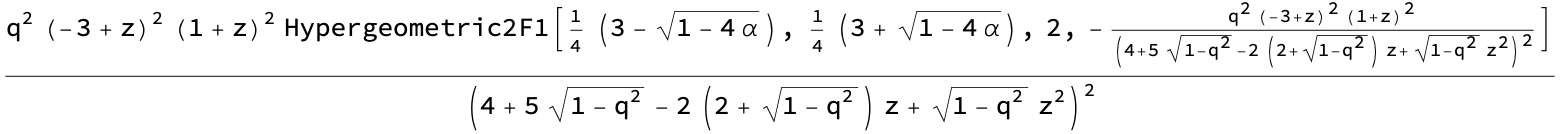
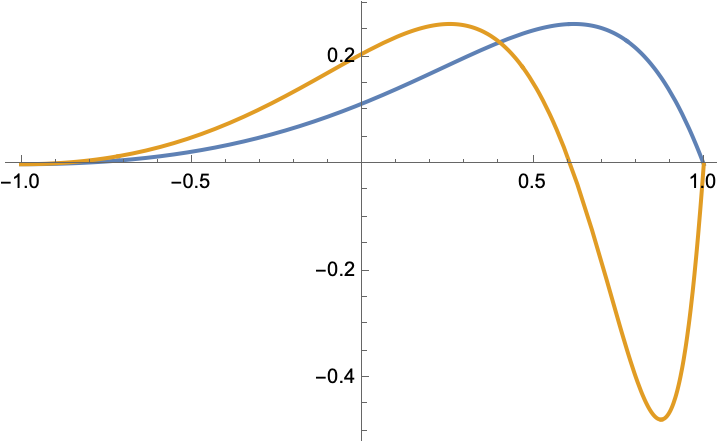

In [42]:
psol3=psol[[1,1,2]]/.\[Zeta] -> (Q^2 (-M^2 + Q^2 + 4 r^2)^2)/((M^2 - Q^2) (M^2 - Q^2 + 4 M r + 4 r^2)^2) /. Q->q M /. M->2  rh/Sqrt[(1 - q^2)] /. r->2 rh/(1-z) /. rh->1 //org
Plot[psol3/.{\[Alpha]->10}/.q->{0.83759,0.976911}//Re//Evaluate,{z,-1,1}]

The upper boundary of the domain  of existence  in the $(q-\alpha )$ space

The purpose of this block is to find the **upper boundary** in the $(q-\alpha)$ space. It's numerically solving a transcendental equation involving the **Hypergeometric2F1** function for different values of parameter and extracting only the real, positive roots for **q**. This would give us the **maximum values** of **q** for which the equation holds at every value in the chosen range.

In [57]:
(* Define the upper boundary of the domain of existence in the (q-\alpha) space *)
upboun = Map[
   Union@Abs@
      Re[q /. Quiet@
         NSolve[q^2/(1 - q^2)
             Hypergeometric2F1[3/4 - 1/4 Sqrt[1 - #*4], 
             3/4 + 1/4 Sqrt[1 - #*4], 2, -(q^2/(1 - q^2))] == 0, 
          q]] &, Range[0.25, 40., 0.05]];

-Graphics-
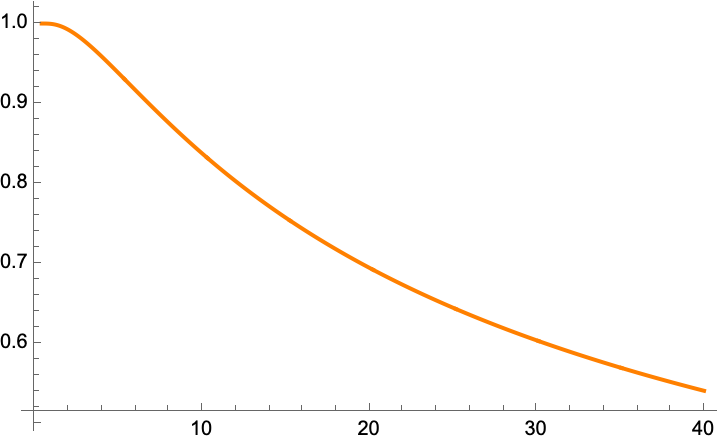

In [59]:
ListLinePlot[Thread[{Range[0.25, 40., 0.05][[4 ;;]], upboun[[4 ;;, 2]]}], PlotStyle -> {Orange}]

## Demonstration of the Solution for $\alpha = 10$

The following code demonstrates how to import and plot some numerical background solutions for the special case where $\alpha = 10$. Specifically, we plot quantities: $B_t(z)$ and $h(z)$ over a numerical grid of $z$-points $x_n$, where $n = 1, 2, ..., 200$. It is obvious that these solutions are perfectly smooth.

In [22]:
allsol = <<"./allsola10";
xn = -Cos[(2Range[200]-1)/(400) Pi];

{-Graphics-, -Graphics-}
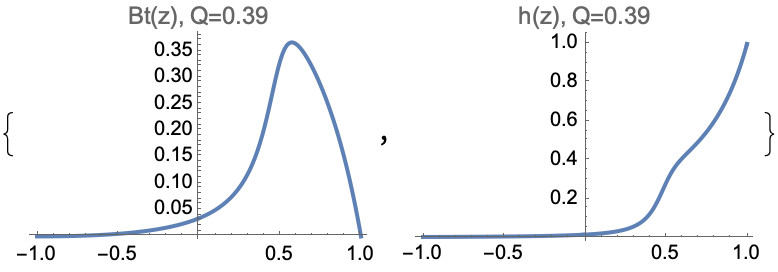

In [25]:
i=-1;
{ListLinePlot[Thread[{xn, allsol[[i, 2, 1]]}], PlotLabel -> "Bt(z), Q=" <> ToString[allsol[[i, 1, 2]]]], 
 ListLinePlot[Thread[{xn, allsol[[i, 2, 2]]}], PlotLabel ->   "h(z), Q=" <> ToString[allsol[[i, 1, 2]]]]}